<a href="https://colab.research.google.com/github/SabbirAhmedUits/Image-Classification/blob/main/Pictures_classification_using_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling, Input
from tensorflow.keras.optimizers import Adam

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Path to  flowers images
dataset_path = '/content/drive/MyDrive/Machine Learning Lab/Project/flower_photos'
img_size = (224, 224)
batch_size = 32
seed = 42

In [6]:
# Load full dataset
full_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=img_size,
    batch_size=batch_size,
    seed=seed,
    shuffle=True  # Shuffle before splitting
)

Found 3670 files belonging to 5 classes.


In [7]:
# Dataset Preprocessing (Split + Prefetch)
# Split dataset (80% train, 20% validation)
train_size = int(0.8 * len(full_ds))
val_size = len(full_ds) - train_size

train_ds = full_ds.take(train_size)
val_ds = full_ds.skip(train_size)

# Improve performance using prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Get number of classes
class_names = full_ds.class_names
num_classes = len(class_names)
print("Flower classes:", class_names)


Flower classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [8]:
# Model Selection (VGG16 as Feature Extractor)
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load VGG16 without top layers
base_model = VGG16(input_shape=(224, 224, 3),
                   include_top=False,
                   weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Build transfer learning model
model = Sequential([
    Input(shape=(224, 224, 3)),
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # 5 flower classes
])


In [9]:
# Model Compilation & Training
# Compile
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=2
)


Epoch 1/2
92/92 ━━━━━━━━━━━━━━━━━━━━ 2980s 27s/step - accuracy: 0.4987 - loss: 8.9713 - val_accuracy: 0.7755 - val_loss: 1.4863
Epoch 2/2
92/92 ━━━━━━━━━━━━━━━━━━━━ 2391s 26s/step - accuracy: 0.8339 - loss: 0.9026 - val_accuracy: 0.7906 - val_loss: 1.1426


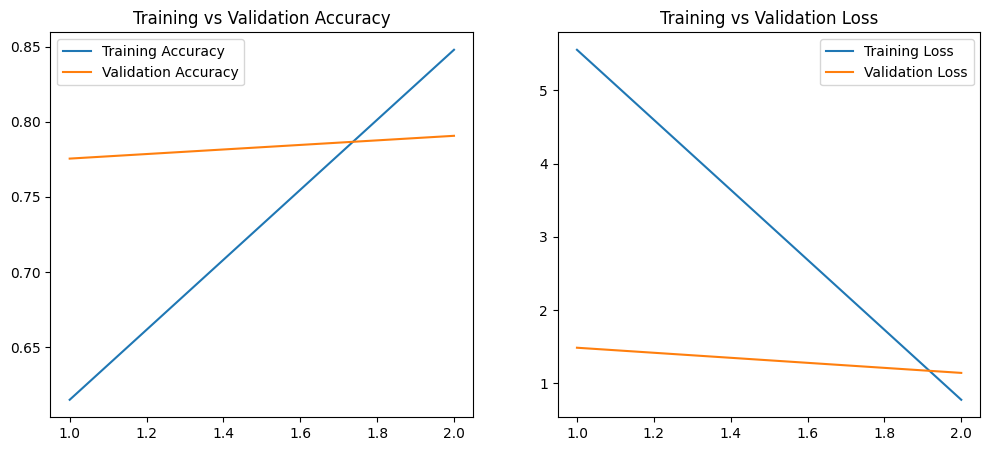

In [10]:
#  Result Visualization
# Plot Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()


In [11]:
 # Metrics Table
 # Final epoch metrics
train_acc = acc[-1] * 100
val_acc = val_acc[-1] * 100
train_loss = loss[-1]
val_loss = val_loss[-1]
num_epochs = len(acc)

# Display in a format like the report table
print("\nMetric\t\t\tValue")
print(f"Training Accuracy\t{train_acc:.2f}%")
print(f"Validation Accuracy\t{val_acc:.2f}%")
print(f"Training Loss\t\t{train_loss:.2f}")
print(f"Validation Loss\t\t{val_loss:.2f}")
print(f"Number of Epochs\t{num_epochs}")



Metric			Value
Training Accuracy	84.78%
Validation Accuracy	79.06%
Training Loss		0.78
Validation Loss		1.14
Number of Epochs	2
